# TP 3

### Par Mathieu Marquis, Charles-Antoine Parent et Thomas Piuze

In [83]:
import numpy as np
import graphinglib as gl
from sklearn.metrics import r2_score        # if trouble importing, try 'pip install scikit-learn'

## 3.1 : Décomposition QR par la méthode de Householder

### **a)** À l’aide des équations (3.2) et (3.3), démontrez que les matrices de réflexion $Q_i$ sont orthogonales.

On note que tous les éléments de matrice sont des matrices également. Ainsi, la notation en gras est omise par simplicité.
\begin{align*}
    Q_i &= \begin{bmatrix}
        I_i & 0 \\
        0 & H_{m,i}
    \end{bmatrix} \\
    H_{m,i} &= I_{m - i} - 2 \frac{v_{m,i} v_{m,i}^T}{v_{m,i}^T v_{m,i}}
\end{align*}

\begin{align*}
    Q_i^T &= \begin{bmatrix}
        I_i^T & 0 \\
        0 & H_{m,i}^T
    \end{bmatrix} \\
    &= \begin{bmatrix}
        I_i & 0 \\
        0 & I_{m - i}^T - 2 \left(\frac{v_{m,i} v_{m,i}^T}{v_{m,i}^T v_{m,i}}\right)^T 
    \end{bmatrix} \\
    &= \begin{bmatrix}
        I_i & 0 \\
        0 & I_{m - i} - 2 \frac{v_{m,i} v_{m,i}^T}{v_{m,i}^T v_{m,i}}
    \end{bmatrix} \\ &= Q_i
\end{align*}

\begin{align*}
    Q_i^T Q_i &= \begin{bmatrix}
        I_i & 0 \\
        0 & I_{m - i} - 2 \frac{v_{m,i} v_{m,i}^T}{v_{m,i}^T v_{m,i}}
    \end{bmatrix}
    \begin{bmatrix}
        I_i & 0 \\
        0 & I_{m - i} - 2 \frac{v_{m,i} v_{m,i}^T}{v_{m,i}^T v_{m,i}}
    \end{bmatrix} \\
    &= \begin{bmatrix}
        I_i^2 & 0 \\
        0 & I_{m - i}^2 - 4 I_{m - i} \frac{v_{m,i} v_{m,i}^T}{v_{m,i}^T v_{m,i}} + 4 \frac{v_{m,i} (v_{m,i}^T v_{m,i}) v_{m,i}^T}{(v_{m,i}^T v_{m,i})^2}
    \end{bmatrix} \\
    &= \begin{bmatrix}
        I_i & 0 \\
        0 & I_{m - i} - 4 \frac{v_{m,i} v_{m,i}^T}{v_{m,i}^T v_{m,i}} + 4 \frac{v_{m,i} v_{m,i}^T}{v_{m,i}^T v_{m,i}}
    \end{bmatrix} \\
    &= \begin{bmatrix}
        I_i & 0 \\
        0 & I_{m - i}
    \end{bmatrix} \\
    &= I_m
\end{align*}
Ce qui montre l'orthogonalité des matrices $Q_i$.

### **b)** Démontrez l’équation (3.5) et que la matrice $Q$ est orthogonale.

On dispose de l'équation:
$$
Q_{n - 1} Q_{n - 2} \cdots Q_1 Q_0A = R
$$
Et on désire obtenir une décomposition $QR$ de la forme:
$$ A = QR $$
Pour ce faire, on prémultiplie chaque côté de l'équation initiale par $Q_{n - 1}^T$, puis par $Q_{n - 2}^T$, et ainsi de suite jusqu'à $Q_0^T$. Étant donné que $Q_i^TQ_i=I_m$, on obtient:
$$
\begin{align*}
    Q_{n - 1}^TQ_{n - 1} Q_{n - 2} \cdots Q_1 Q_0A &= Q_{n - 1}^T R \\
    I_m Q_{n - 2} \cdots Q_1 Q_0A &= Q_{n - 1}^T R \\
    Q_{n - 2}^TQ_{n - 2} \cdots Q_1 Q_0A &= Q_{n - 2}^T Q_{n - 1}^T R \\
    &\: \cdots \\
    A &= Q_0^T Q_1^T \cdots Q_{n - 2}^T Q_{n - 1}^TR \\
    \implies Q &= Q_0^T Q_1^T \cdots Q_{n - 2}^T Q_{n - 1}^T
\end{align*}
$$
Ce qui démontre l'équation (3.5). On veut ensuite montrer que la matrice $Q$ est orthogonale:
$$
\begin{align*}
    Q &= Q_0^T Q_1^T \cdots Q_{n - 2}^T Q_{n - 1}^T \\
    \Rightarrow Q^T &= (Q_0^T Q_1^T \cdots Q_{n - 2}^T Q_{n - 1}^T)^T \\
    &= Q_{n - 1} Q_{n - 2} \cdots Q_1 Q_0
\end{align*}
$$

$$
\begin{align*}
    Q^T Q &= (Q_{n - 1} Q_{n - 2} \cdots Q_1 Q_0) (Q_0^T Q_1^T \cdots Q_{n - 2}^T Q_{n - 1}^T) \\
    &= Q_{n - 1} Q_{n - 2} \cdots Q_1 Q_0 Q_0^T Q_1^T \cdots Q_{n - 2}^T Q_{n - 1}^T
\end{align*}
$$
En **a)**, on a démontré que $Q_i^T = Q_i$ et que $Q_i^T Q_i = I$. $Q_i^T$ est donc la matrice inverse de $Q_i$, ce qui veut dire qu'on a également $Q_iQ_i^T = I$. On peut alors annuler les termes à partir du centre dans l'expression pour $Q^T Q$ :
$$
\begin{align*}
    Q^T Q &= Q_{n - 1} Q_{n - 2} \cdots Q_1 (Q_0 Q_0^T) Q_1^T \cdots Q_{n - 2}^T Q_{n - 1}^T \\
    &= Q_{n - 1} Q_{n - 2} \cdots Q_1 I Q_1^T \cdots Q_{n - 2}^T Q_{n - 1}^T \\
    &= Q_{n - 1} Q_{n - 2} \cdots (Q_1 Q_1^T) \cdots Q_{n - 2}^T Q_{n - 1}^T \\
    &\: \cdots \\
    &= I
\end{align*}
$$
Ce qui montre que la matrice $Q$ est orthogonale.

### **c)** Implémentez la fonction `householder_qr` qui prend en argument une matrice $A$ et qui retourne les matrices $Q$ et $R$ obtenues par la méthode de Householder.

In [84]:
def householder_qr(A: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    """
    Performe une décomposition QR d'une matrice en utilisant la méthode de Householder

    Paramètres:
    -----------
    A (np.ndarray) : La matrice à décomposer

    Retourne:
    --------
    tuple[np.ndarray, np.ndarray]
        Un tuple contenant deux numpy arrays:
        - Q: La matrice orthogonale
        - R: La matrice triangulaire supérieure résultante
    """
    m, n = A.shape
    Q = np.eye(m)
    R = np.copy(A)
    for i in range(n):
        x = R[i:, i]
        e_1 = np.zeros(m - i)
        e_1[0] = 1
        v = np.sign(x[0]) * np.linalg.norm(x) * e_1 + x
        H = np.eye(m - i) - 2 * np.outer(v, v.T) / np.dot(v.T, v)
        Q_i = np.eye(m)
        Q_i[i:, i:] = H
        Q = np.dot(Q, Q_i.T)
        R = np.dot(Q_i, R)
    return Q, R

### **d)** À l’aide d’une matrice de dimension $4 \times 3$ de votre choix, testez votre fonction `householder_qr` et comparez les résultats obtenus avec ceux obtenus à l’aide de la fonction `numpy.linalg.qr`. Les matrices sont-elles exactement les mêmes ? Si non, est-ce un problème ?

In [85]:
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9],
              [10, 11, 12]])

Q_1, R_1 = householder_qr(A)
print("householder_qr :", f'Q = {Q_1}', f'R = {R_1}', sep='\n')

Q_2, R_2 = np.linalg.qr(A, mode='complete')
print("np.linalg.qr :", f'Q = {Q_2}', f'R = {R_2}', sep='\n')

print(f"Différences entre les matrices Q:\n{np.abs(Q_1 - Q_2)}")
print(f"Différences entre les matrices R:\n{np.abs(R_1 - R_2)}")

householder_qr :
Q = [[-0.07761505 -0.83305216  0.2276611  -0.49816706]
 [-0.31046021 -0.45123659  0.06776367  0.83391132]
 [-0.54330537 -0.06942101 -0.81851065 -0.17332144]
 [-0.77615053  0.31239456  0.52308587 -0.16242281]]
R = [[-1.28840987e+01 -1.45916299e+01 -1.62991610e+01]
 [ 1.39795446e-15 -1.04131520e+00 -2.08263040e+00]
 [-8.43853050e-16 -8.35017355e-18  1.52173211e-15]
 [ 7.01541499e-16 -5.22176386e-17  9.21885814e-32]]
np.linalg.qr :
Q = [[-0.07761505 -0.83305216  0.5472782  -0.0220583 ]
 [-0.31046021 -0.45123659 -0.71326299  0.43732815]
 [-0.54330537 -0.06942101 -0.21530863 -0.80848141]
 [-0.77615053  0.31239456  0.38129342  0.39321156]]
R = [[-1.28840987e+01 -1.45916299e+01 -1.62991610e+01]
 [ 0.00000000e+00 -1.04131520e+00 -2.08263040e+00]
 [ 0.00000000e+00  0.00000000e+00 -4.51848010e-15]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
Différences entre les matrices Q:
[[2.22044605e-16 2.88657986e-15 3.19617102e-01 4.76108768e-01]
 [1.11022302e-16 2.72004641e-15 7.8

Nous avons passé l'argument `mode='complete'` à la fonction `numpy.linalg.qr`, car cette dernière retourne par défaut la décomposition réduite, alors que nous voulons comparer notre résultat avec la décomposition standard. En négligeant les différences de l'ordre de $10^{-15}$ ou moins qui peuvent provenir de diverses erreurs d'approximation numériques, on constate que les matrices $R$ ainsi que les deux premières colonnes de $Q$ sont identiques. Les deux dernières colonnes de $Q$ sont différentes, mais puisque les deux dernières lignes de $R$ sont nulles (ou avec de très faibles valeurs, qui peuvent être considérées comme nulles), cela ne change rien au résultat $A=QR$. Cette différence n'est donc pas un problème, d'autant plus que selon les dimensions et le rang de la matrice $A$, la décomposition $QR$ n'est pas toujours unique [1].

On remarque aussi que la méthode `numpy.linalg.qr` engendre deux lignes presque uniquement composées de zéros dans la matrice $R$ (le seul élément non-nul est de l'ordre de $10^{-15}$, donc négligeable). Les éléments de ces lignes sont aussi négligeables dans la matrice $R$ donnée par la méthode de `householder`, ce qui provient du fait que les colonnes de la matrice $A$ utilisée ne sont pas linéairement indépendantes. En effet, la deuxième colonne peut être obtenue en faisant la moyenne des colonnes 1 et 3. En utilisant une matrice dont nous savons que le rang est égal à son nombre de colonnes, on obtient une matrice $R$ avec une seule ligne de zéros:

In [86]:
A = np.array([[1, 1, 2],
              [8, 5, 13],
              [13, 21, 34],
              [55, 144, 89]])

print(f'Vérification: rang(A) = {np.linalg.matrix_rank(A)} = nb colonnes = {A.shape[1]}')

Q_1, R_1 = householder_qr(A)
print("householder_qr :", f'Q = {Q_1}', f'R = {R_1}', sep='\n')

Q_2, R_2 = np.linalg.qr(A, mode='complete')
print("np.linalg.qr :", f'Q = {Q_2}', f'R = {R_2}', sep='\n')

print(f"Différences entre les matrices Q:\n{np.abs(Q_1 - Q_2)}")
print(f"Différences entre les matrices R:\n{np.abs(R_1 - R_2)}")

Vérification: rang(A) = 3 = nb colonnes = 3
householder_qr :
Q = [[-1.75169230e-02 -7.63792287e-02  2.63305349e-02 -9.96577179e-01]
 [-1.40135384e-01 -7.61136286e-01  6.28523859e-01  7.74040527e-02]
 [-2.27719998e-01 -5.92656757e-01 -7.72048594e-01  2.90265198e-02]
 [-9.63430762e-01  2.52181952e-01  9.05838240e-02  3.27341060e-17]]
R = [[-5.70876519e+01 -1.44234344e+02 -9.53446116e+01]
 [ 3.24335015e-16  1.99863485e+01 -7.75366619e+00]
 [-8.77982454e-16  1.62894111e-15 -9.96422064e+00]
 [ 2.65567732e-15 -1.38852788e-16 -3.28850384e-16]]
np.linalg.qr :
Q = [[-1.75169230e-02 -7.63792287e-02  2.63305349e-02 -9.96577179e-01]
 [-1.40135384e-01 -7.61136286e-01  6.28523859e-01  7.74040527e-02]
 [-2.27719998e-01 -5.92656757e-01 -7.72048594e-01  2.90265198e-02]
 [-9.63430762e-01  2.52181952e-01  9.05838240e-02  2.98937733e-16]]
R = [[ -57.0876519  -144.2343436   -95.34461163]
 [   0.           19.98634852   -7.75366619]
 [   0.            0.           -9.96422064]
 [   0.            0.         

On trouve toujours une ligne de zéros, car les lignes de la matrice $A$, elles, ne peuvent pas être linéairement indépendantes, puisqu'on a seulement besoin de 3 vecteurs pour former une base d'un espace vectoriel à trois dimensions.

### **e)** À l’aide de la matrice utilisée en **d**, illustrez comment la multiplication successive des matrices $Q_i$ triangularise progressivement la matrice $A$. Dans l’élan, assurez-vous que les matrices $Q$ et $R$ obtenues sont bien orthogonale et triangulaire supérieure, respectivement.

In [102]:
def householder_qr_successif(A: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    """
    Performe une décomposition QR d'une matrice en utilisant la méthode de Householder

    Paramètres:
    -----------
    A (np.ndarray) : La matrice à décomposer

    Retourne:
    --------
    tuple[np.ndarray, np.ndarray]
        Un tuple contenant deux numpy arrays:
        - Q: La matrice orthogonale
        - R: La matrice triangulaire supérieure résultante
    """
    print("A =", A)
    m, n = A.shape
    Q = np.eye(m)
    R = np.copy(A)
    for i in range(n):
        x = R[i:, i]
        e_1 = np.zeros(m - i)
        e_1[0] = 1
        v = np.sign(x[0]) * np.linalg.norm(x) * e_1 + x
        H = np.eye(m - i) - 2 * np.outer(v, v.T) / np.dot(v.T, v)
        Q_i = np.eye(m)
        Q_i[i:, i:] = H
        Q = np.dot(Q, Q_i.T)
        R = np.dot(Q_i, R)
        print(f"i = {i} : Q^T * A = \n{R}")

householder_qr_successif(A)

A = [[  1   1   2]
 [  8   5  13]
 [ 13  21  34]
 [ 55 144  89]]
i = 0 : Q^T * A = 
[[-5.70876519e+01 -1.44234344e+02 -9.53446116e+01]
 [-2.22044605e-16 -1.50020953e+01 -4.06582424e-01]
 [ 1.16573418e-15 -1.15034049e+01  1.22143036e+01]
 [ 2.55351296e-15  6.48559486e+00 -3.17025417e+00]]
i = 1 : Q^T * A = 
[[-5.70876519e+01 -1.44234344e+02 -9.53446116e+01]
 [ 3.24335015e-16  1.99863485e+01 -7.75366619e+00]
 [ 1.34537137e-15 -1.62708993e-15  9.79874946e+00]
 [ 2.45223389e-15  1.59083642e-16 -1.80836997e+00]]
i = 2 : Q^T * A = 
[[-5.70876519e+01 -1.44234344e+02 -9.53446116e+01]
 [ 3.24335015e-16  1.99863485e+01 -7.75366619e+00]
 [-8.77982454e-16  1.62894111e-15 -9.96422064e+00]
 [ 2.65567732e-15 -1.38852788e-16 -3.28850384e-16]]


On remarque que chaque itération triangularise une colonne de la matrice $A$. On constate par le fait même que la matrice $R$ obtenue à la dernière itération est bel et bien triangulaire supérieure, car tous les éléments en-dessous de la diagonale principale sont de l'ordre de $10^{-15}$ ou moins, ce qui est négligeable. De plus, on peut vérifier que la matrice $Q$ est bel et bien orthogonale:

In [88]:
Q, R = householder_qr(A)
verif = np.dot(Q.T, Q)
print("Q^T Q =", verif)

Q^T Q = [[ 1.00000000e+00 -6.26941684e-17  2.32315214e-17 -1.20361242e-16]
 [-6.26941684e-17  1.00000000e+00  1.45269338e-16 -1.91171559e-18]
 [ 2.32315214e-17  1.45269338e-16  1.00000000e+00  1.02788504e-17]
 [-1.20361242e-16 -1.91171559e-18  1.02788504e-17  1.00000000e+00]]


$Q^T Q$ est assez proche de la matrice identité de dimensions $4 \times 4$, puisque tous les éléments en dehors de la diagonale sont de l'ordre de $10^{-16}$ ou moins, ce qui est négligeable.

## 3.2 : Mesures imprécises dans un jeu de bataille navale

### **a)** Modifiez votre code de décomposition QR pour qu’il retourne la décomposition QR réduite de la matrice d’entrée lorsque l’argument additionnel `reduite=True` lui est passé.

In [89]:
def householder_qr(A: np.ndarray, reduite: bool=False) -> tuple[np.ndarray, np.ndarray]:
    """
    Performe une décomposition QR d'une matrice en utilisant la méthode de Householder

    Paramètres:
    -----------
    A (np.ndarray) : La matrice à décomposer
    reduite (bool) : Précise si la décomposition QR réduite est désirée. Par défaut, c'est False.

    Retourne:
    --------
    tuple[np.ndarray, np.ndarray]
        Un tuple contenant deux numpy arrays:
        - Q: La matrice orthogonale
        - R: La matrice triangulaire supérieure résultante
    """
    m, n = A.shape
    Q = np.eye(m)
    R = np.copy(A)
    for i in range(n):
        x = R[i:, i]
        e_1 = np.zeros(m - i)
        e_1[0] = 1
        v = np.sign(x[0]) * np.linalg.norm(x) * e_1 + x
        H = np.eye(m - i) - 2 * np.outer(v, v.T) / np.dot(v.T, v)
        Q_i = np.eye(m)
        Q_i[i:, i:] = H
        Q = np.dot(Q, Q_i.T)
        R = np.dot(Q_i, R)
    if reduite:
        Q, R = Q[:m, :n], R[:n, :n]
    return Q, R

Q_1, R_1 = householder_qr(A, reduite=True)
print("householder_qr :", f'Q = {Q_1}', f'R = {R_1}', sep='\n')

Q_2, R_2 = np.linalg.qr(A)
print("np.linalg.qr :", f'Q = {Q_2}', f'R = {R_2}', sep='\n')

print(f"Différences entre les matrices Q:\n{np.abs(Q_1 - Q_2)}")
print(f"Différences entre les matrices R:\n{np.abs(R_1 - R_2)}")

householder_qr :
Q = [[-0.01751692 -0.07637923  0.02633053]
 [-0.14013538 -0.76113629  0.62852386]
 [-0.22772    -0.59265676 -0.77204859]
 [-0.96343076  0.25218195  0.09058382]]
R = [[-5.70876519e+01 -1.44234344e+02 -9.53446116e+01]
 [ 3.24335015e-16  1.99863485e+01 -7.75366619e+00]
 [-8.77982454e-16  1.62894111e-15 -9.96422064e+00]]
np.linalg.qr :
Q = [[-0.01751692 -0.07637923  0.02633053]
 [-0.14013538 -0.76113629  0.62852386]
 [-0.22772    -0.59265676 -0.77204859]
 [-0.96343076  0.25218195  0.09058382]]
R = [[ -57.0876519  -144.2343436   -95.34461163]
 [   0.           19.98634852   -7.75366619]
 [   0.            0.           -9.96422064]]
Différences entre les matrices Q:
[[0.00000000e+00 1.98452366e-15 4.81559237e-15]
 [2.77555756e-17 1.11022302e-16 1.11022302e-16]
 [5.55111512e-17 0.00000000e+00 1.11022302e-16]
 [2.22044605e-16 0.00000000e+00 6.93889390e-17]]
Différences entre les matrices R:
[[7.10542736e-15 2.84217094e-14 2.84217094e-14]
 [3.24335015e-16 0.00000000e+00 8.88178

Cette fois-ci, nous n'avons pas passé l'argument `mode='complete'` à la fonction `numpy.linalg.qr`, car nous voulons comparer notre résultat avec la décomposition réduite (le mode par défaut). Encore une fois, en négligeant les différences de l'ordre de $10^{-15}$ ou moins, on constate que les matrices $R$ ainsi que les deux premières colonnes de $Q$ sont identiques. La dernière colonne de $Q$ est différente, mais puisque la dernière ligne de $R$ est nulle (ou presque), cela n'affecte pas le résultat, tel qu'expliqué précédemment.

### **b)** Utilisez votre code pour résoudre approximativement l’équation (3.9). Vous utiliserez les données fournies dans le fichier `bataille_navale_equipe0XX.csv` où vous remplacerez 0XX par votre numéro d’équipe dans la boîte de dépôt sur MonPortail.

In [ ]:
x, Y = np.loadtxt('devoirs/tp3/bataille_navale_donnees_2025/bataille_navale_equipe010.csv', unpack=True, delimiter=',', skiprows=1)
X = np.array([np.ones_like(x), x, x**2]).T
Q, R = householder_qr(X, reduite=True)

def retrosubstitution(A: np.ndarray, b: np.ndarray) -> np.ndarray:
    """
    Effectue la rétro-substitution pour résoudre un système d'équations linéaires de la forme Ax = b
    où A est une matrice triangulaire supérieure.
    
    Paramètres:
    -----------
    A (np.ndarray) : La matrice triangulaire supérieure.
    b (np.ndarray) : Le vecteur de constantes.
    
    Retourne:
    --------
    np.ndarray
        Le vecteur solution x.
    """
    m, n = A.shape
    x = np.empty(m)
    for i in range(m-1, -1, -1):
        x[i] = b[i]/A[i,i]
        for j in range(i+1, n):
            x[i] -= A[i,j]/A[i,i]*x[j]
    return x

alpha = retrosubstitution(R, np.dot(Q.T, Y))
alpha_0, alpha_1, alpha_2 = alpha
print(f'y(x) = {alpha_0} + {alpha_1}x + {alpha_2}x^2')

y(x) = -468.12629407150234 + 2.5892795909125086x + -0.0009137595448015179x^2


Cette équation est la solution approximative recherchée.

### **c)** Tracez les données (cercles noirs) et la solution estimée de la trajectoire(ligne pleine de la couleur de votre choix) donnée par l’équation (3.8)

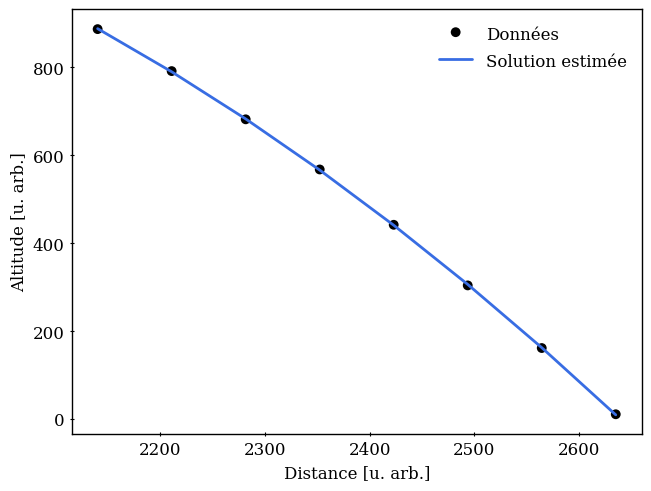

Coefficient de détermination : 0.9999775058519541


In [91]:
fig = gl.Figure('Distance [u. arb.]', 'Altitude [u. arb.]')
fig.add_elements(
    gl.Scatter(x, Y, label='Données', face_color='black'),
    gl.Curve(x, np.dot(X, alpha), label='Solution estimée')
)
fig.show()
print(f"Coefficient de détermination : {r2_score(Y, np.dot(X, alpha))}")

On remarque que la solution trouvée s'agence très bien avec les données, avec un coefficient de détermination très près de l'unité, ce qui indique que la tendance est bien représentée.

### **d)** Obtenez la position d’impact du projectile (à $y = 0$) en résolvant l’équation quadratique (3.8) pour $x$ à l’aide d’une implémentation personnelle de la méthode de la bissection. Comparez votre solution avec celle obtenue en résolvant cette même équation analytiquement. Considérant que votre embarcation se situe à la position $(x,y) = (0,0)$, quelle est la distance horizontale vous séparant du point d’impact ?

Le code suivant implante la méthode de la bissection pour déterminer la position d'impact du projectile. Les bornes initiales de l'intervalle, soit de 2600 à 2700, ont été choisies en se fiant au graphique de la question 3.2 c).

In [ ]:
def f(x: float) -> float:
    """Fonction à minimiser pour trouver la position d'impact du projectile."""
    return np.dot(alpha, np.array([1, x, x**2]))

def bissection(xA: float, xB: float, precision: float=1e-8) -> float:
    """
    Méthode de bissection pour trouver la racine d'une fonction f dans l'intervalle [xA, xB].
    
    Paramètres:
    -----------
    xA (float) : Borne inférieure de l'intervalle.
    xB (float) : Borne supérieure de l'intervalle.
    precision (float) : Précision désirée pour la solution.
    
    Retourne:
    --------
    float
        La valeur de x pour laquelle f(x) = 0.
    """
    erreur = 1
    dernier_x = None
    while np.abs(erreur) > precision:
        xM = (xA+xB)/2
        erreur = xM - dernier_x if dernier_x is not None else 1
        dernier_x = xM
        if f(xA)*f(xM) >= 0:
            xA = xM
        elif f(xB)*f(xM) >= 0 :
            xB = xM
        else:
            # f(xA) et f(xB) sont du même signe, alors les valeurs initiales de xA et xB doivent être modifiées
            raise ValueError("f(xA) et f(xB) sont du même signe.")
    return dernier_x

pos_bissection = bissection(2600, 2700)
print(f"Position d'impact du projectile: {pos_bissection}")

Position d'impact du projectile: 2639.5674684259575


Le code suivant permet d'obtenir analytiquement le point d'impact du projectile (en $x$), qui correspond également à la distance horizontale séparant l'embarcation du point d'impact, car l'embarcation se situe à l'origine du système de coordonnées.

In [93]:
c, b, a = alpha
rad = np.sqrt(b**2-4*a*c)
x1, x2 = (-b-rad)/(2*a), (-b+rad)/(2*a)
position_analytique = max(x1, x2)
print(f"Position d'impact du projectile/distance horizontale: {position_analytique}")
print(f"Erreur de la méthode de bissection: {np.abs(pos_bissection - position_analytique)}")

Position d'impact du projectile/distance horizontale: 2639.5674684226465
Erreur de la méthode de bissection: 3.3110154618043453e-09


On constate que les deux solutions ont une différence de l'ordre de $10^{-9}$, ce qui respecte la précision par défaut choisie pour la fonction `bissection`. Cette méthode permet ainsi de faire l'approximation adéquate des zéros d'une fonction.

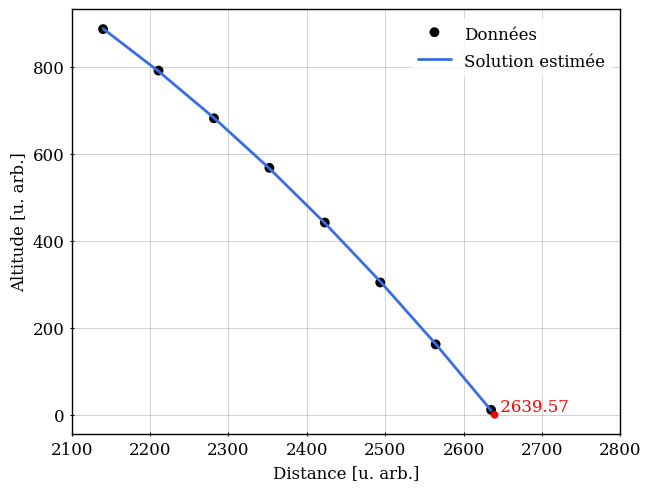

In [94]:
fig = gl.Figure('Distance [u. arb.]', 'Altitude [u. arb.]', show_grid=True, x_lim=(2100, 2800))
fig.add_elements(
    gl.Scatter(x, Y, label='Données', face_color='black'),
    gl.Curve(x, np.dot(X, alpha), label='Solution estimée'),
    gl.Point(position_analytique, 0, label=f"{position_analytique:.2f}", color='red')
)
fig.show()

Le graphique ci-dessus illustre le point d'impact du projectile tel que calculé.

## 3.3 : Modèle épidemiologique SIR sur réseau

### **a)** Trouvez analytiquement toutes les solutions de l’équation cubique (3.14).

L'équation cubique à résoudre est:
$$ u = \frac{1}{\left[1+T(\kappa-1)(1-u)\right]^2} $$
On peut trouver les solutions de cette équation à l'aide de quelques manipulations algébriques:
$$ \begin{align*}
        u\left[1+T(\kappa-1)(1-u)\right]^2 &= 1 \\
        u\left[T^2(\kappa-1)^2(1-u)^2+2T(\kappa-1)(1-u)+1\right]-1 &= 0 \\
        u\left[T^2(\kappa-1)^2(1-u)^2+2T(\kappa-1)(1-u)+1-\frac{1}{u}\right] &= 0 \\
        u\left[T^2(\kappa-1)^2(1-u)^2+2T(\kappa-1)(1-u)-\frac{1}{u}(1-u)\right] &= 0 \\
        u(1-u)\left[T^2(\kappa-1)^2(1-u)+2T(\kappa-1)-\frac{1}{u}\right] &= 0 \\
        (1-u)\left[T^2(\kappa-1)^2u(1-u)+2T(\kappa-1)u-1\right] &= 0 \\
        (1-u)\left[u(1-u)+\frac{2}{T(\kappa-1)}u-\frac{1}{T^2(\kappa-1)^2}\right] &= 0 \\
        (1-u)\left[u-u^2+\frac{2}{T(\kappa-1)}u-\frac{1}{T^2(\kappa-1)^2}\right] &= 0 \\
        (u-1)\left[u^2-\frac{T(\kappa-1)+2}{T(\kappa-1)}u+\frac{1}{T^2(\kappa-1)^2}\right] &= 0
    \end{align*} $$
Il faut désormais trouver les racines de la portion quadratique de l'équation:
$$ \begin{align*}
        u &= \frac{1}{2}\left(\frac{T(\kappa-1)+2}{T(\kappa-1)}\pm\sqrt{\left(\frac{T(\kappa-1)+2}{T(\kappa-1)}\right)^2-\frac{4}{T^2(\kappa-1)^2}}\right) \\
        &= \frac{1}{2}\left(1+\frac{2}{T(\kappa-1)}\pm\sqrt{\frac{T^2(\kappa-1)^2+4T(\kappa-1)+4-4}{T^2(\kappa-1)^2}}\right) \\
        &= \frac{1}{2}\left(1+\frac{2}{T(\kappa-1)}\pm\sqrt{1+\frac{4}{T(\kappa-1)}}\right)
    \end{align*} $$
On a donc:
$$ \begin{align*}
        (u-1)\left(u-\frac{1}{2}\left[1+\frac{2}{T(\kappa-1)}+\sqrt{1+\frac{4}{T(\kappa-1)}}\right]\right)\left(u-\frac{1}{2}\left[1+\frac{2}{T(\kappa-1)}-\sqrt{1+\frac{4}{T(\kappa-1)}}\right]\right) &= 0
    \end{align*} $$
Les trois racines de cette équation sont alors: 
$$ u_1=1 \\
u_2=\frac{1}{2}\left[1+\frac{2}{T(\kappa-1)}+\sqrt{1+\frac{4}{T(\kappa-1)}}\right] \\
u_3=\frac{1}{2}\left[1+\frac{2}{T(\kappa-1)}-\sqrt{1+\frac{4}{T(\kappa-1)}}\right] $$

### **b)** Démontrez laquelle des solutions obtenues précédemment (ou une combinaison de celles-ci) correspond à $u$, soit la solution recherchée de l’équation (3.14).

La solution recherchée est la plus petite solution non négative de (3.14). En remplaçant $\kappa$ par sa valeur $\kappa=5$, les trois solutions deviennent:
$$ \begin{align*}
    u_1 &= 1 \\
    u_2 &= \frac{1}{2}\left[1+\frac{1}{2T}+\sqrt{1+\frac{1}{T}}\right] \\
    u_3 &= \frac{1}{2}\left[1+\frac{1}{2T}-\sqrt{1+\frac{1}{T}}\right]
\end{align*} $$
Puisque $0\leq T\leq1$, $u_2$ est toujours plus grande que $u_3$. On peut vérifier si $u_3$ possède des zéros:
$$ \begin{align*}
    \frac{1}{2}\left[1+\frac{1}{2T}-\sqrt{1+\frac{1}{T}}\right] &= 0 \\
    1+\frac{1}{2T} &= \sqrt{1+\frac{1}{T}} \\
    1+\frac{1}{T}+\frac{1}{4T^2} &= 1+\frac{1}{T} \\
    \frac{1}{4T^2} &= 0
\end{align*} $$
Pour $0\leq T\leq 1$, cette équation ne peut être satisfaite. $u_3$ est donc toujours du même signe. Pour $T=0.1$ et $T=1$, nous avons:
$$ \begin{align*}
        u_3(0.1) &= \frac{1}{2}\left[1+\frac{1}{0.2}-\sqrt{1+\frac{1}{0.1}}\right] = \frac{1}{2}\left[6-\sqrt{11}\right] \approx 1.3417 > 0 \\
        u_3(1) &= \frac{1}{2}\left[1+\frac{1}{2}-\sqrt{1+\frac{1}{1}}\right] = \frac{1}{2}\left[\frac{3}{2}-\sqrt{2}\right] \approx 0.04289 > 0
    \end{align*} $$
Ce qui signifie que $u_3$ est toujours positive. Il reste à déterminer si $u_3$ est plus petite ou plus grande que $u_1$. Pour ce faire, il faut d'abord trouver les intersections de $u_1$ et $u_3$:
$$ \begin{align*}
    \frac{1}{2}\left[1+\frac{1}{2T}-\sqrt{1+\frac{1}{T}}\right] &= 1 \\
    1+\frac{1}{2T} &= 2+\sqrt{1+\frac{1}{T}} \\
    \frac{1}{2T}-1 &= \sqrt{1+\frac{1}{T}} \\
    \frac{1}{4T^2}-\frac{1}{T}+1 &= 1+\frac{1}{T} \\
    \frac{1}{4T^2} &= \frac{2}{T} \\
    T &= \frac{1}{8}
\end{align*} $$
$u_1$ et $u_3$ sont donc équivalentes pour $T=0.125$. Pour $0.125 < T \leq 1$, $u_1>u_3$, car $u_3(1) \approx 0.04289 < u_1(1) = 1$. Pour $0 \leq T < 0.125$, $u_1<u_3$, car $u_3(0.1) \approx 1.3417 > u_1(0.1) = 1$. La solution recherchée de l'équation (3.14) est donc $u_1$ pour $0 \leq T \leq 0.125$ et $u_3$ pour $0.125 \leq T \leq 1$.

### **c)** Tracez $R_\infty$ en fonction de $T$ et identifiez tout changement qualitatif de $R_\infty$. Comment interprétez-vous ce changement (ou cette absence de changement) ?

/var/folders/js/7v50zmys2wzf_12nkl6qzq8r0000gn/T/ipykernel_73853/1460376128.py:2: RuntimeWarning: divide by zero encountered in divide
  u = np.min(np.stack([np.ones_like(T), 0.5*(1 + 2 / (T*(k - 1)) - np.sqrt(1 + 4 / (T*(k - 1)))), 0.5*(1 + 2 / (T*(k - 1)) + np.sqrt(1 + 4 / (T*(k - 1))))]), axis=0)
/var/folders/js/7v50zmys2wzf_12nkl6qzq8r0000gn/T/ipykernel_73853/1460376128.py:2: RuntimeWarning: invalid value encountered in subtract
  u = np.min(np.stack([np.ones_like(T), 0.5*(1 + 2 / (T*(k - 1)) - np.sqrt(1 + 4 / (T*(k - 1)))), 0.5*(1 + 2 / (T*(k - 1)) + np.sqrt(1 + 4 / (T*(k - 1))))]), axis=0)


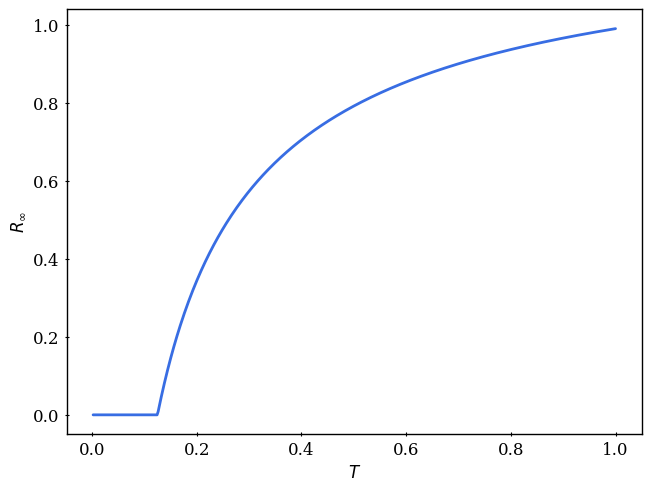

In [ ]:
def r_infty(T: float | np.ndarray, k: float = 5) -> float | np.ndarray:
    """
    Fraction de la population qui sera infecté à un moment ou un autre pendant une épidémie.

    Paramètres:
    -----------
    T (float | np.ndarray) : Probabilité qu'un individu infecté infecte tous ces voisins.
    k (float) : Paramètre de la distribution.
    """
    u = np.min(np.stack([np.ones_like(T), 0.5*(1 + 2 / (T*(k - 1)) - np.sqrt(1 + 4 / (T*(k - 1)))), 0.5*(1 + 2 / (T*(k - 1)) + np.sqrt(1 + 4 / (T*(k - 1))))]), axis=0)
    return 1 - ((1 - T*(1 - u)) / (1 + T*(k - 1)*(1 - u)))

fig = gl.Figure(r"$T$", r"$R_{\infty}$")
fig.add_elements(
    gl.Curve.from_function(r_infty, 0, 1)
    )
fig.show()

Un changement se produit à $T=0.125$. La valeur de $R_\infty$, auparavant nulle, augmente brusquement. Cette augmentation ralentit ensuite peu à peu. L'interprétation épidémiologique de ce phénomène est qu'avant ce point de bascule, la probabilité $T$ qu'un individu contagieux infecte ses voisins est trop faible. Ainsi, pour un nombre moyen de contacts $\kappa=5$, le virus ne parvient pas à se répandre dans la population. Lorsque $T$ atteint la valeur clé de $0.125$, la probabilité devient juste assez élevée pour une épidémie, et $R_\infty$ augmente abruptement. La croissance de $R_\infty$ se fait toutefois de plus en plus lente à mesure que $T$ augmente, car peu importe la contagiosité de la maladie, il y aura toujours des individus isolés ayant peu de contacts avec les individus infectés, de telle sorte qu'il sera difficile pour la maladie d'atteindre ces individus reclus.

### **d)** Résolvez numériquement l’équation (3.14) à l’aide d’implémentations personnelles de la méthode par relaxation et de la méthode de Newton-Raphson pour 20 valeurs de $T$ uniformément distribuées dans l’intervalle $[0,1]$. Illustrez vos résultats à l’aide d’un graphique comparant les solutions analytiques (indiquées avec des lignes de couleurs distinctes) aux solutions numériques obtenues avec différentes valeurs initiales de l’algorithme (symboles ; choisissez bien vos symboles pour que vos solutions soient bien visibles). Arrivez-vous à obtenir les trois solutions identifiées en a ? Pourquoi ? Considérez tracer l’équation (3.14) de même que la dérivée de $f(u)$ en fonction de u et ce, pour quelques valeurs de $T$, pour appuyer vos conclusions. Vous pouvez aussi tracer les itérations successives de chacune des méthodes afin d’illustrer la manière dont elles convergent vers l’une ou l’autre des solutions (ex. : tracer un diagramme en toile d’araignée).


Le code suivant définit les solutions analytiques de l'équation, sa forme non-générale, la dérivée de sa forme non-générale, sa forme générale et la dérivée de sa forme générale. On appelle forme non-générale l'équation lorsqu'elle est exprimée sous la forme $u=f(u)$, et forme générale l'équation lorsqu'elle est exprimée sous la forme $f(u)=0$.

In [ ]:
# Définition d'objets dont on aura besoin pour la suite

def sol_analytiques(T: float | np.ndarray, k: float = 5) -> float | np.ndarray:
    """
    Calcule la solution analytique de l'équation pour un T donné

    Paramètres:
    -----------
    T (float | np.ndarray) : La probabilité qu’un individu contagieux infectera chacun de ses voisins indépendamment.
    k (float) : (défaut: 5)
    """
    return np.array([np.ones_like(T), 0.5*(1 + 2 / (T*(k - 1)) + np.sqrt(1 + 4 / (T*(k - 1)))), 0.5*(1 + 2 / (T*(k - 1)) - np.sqrt(1 + 4 / (T*(k - 1))))])

def fu(u: float, T: float, k: float = 5) -> float:
    """
    Calcule la fonction f(u) sous sa forme non-générale (équation 3.14) pour un T et k donnés.

    Paramètres:
    -----------
    u (float) : La valeur de u pour laquelle on veut calculer f(u)
    T (float) : La probabilité qu’un individu contagieux infectera chacun de ses voisins indépendamment.
    k (float) : (défaut: 5)
    """
    return 1 / (1 + T*(k - 1)*(1 - u))**2

def dfu(u: float, T: float, k: float = 5) -> float:
    """
    Calcule la dérivée de la fonction f(u) sous sa forme non-générale (équation 3.14) pour un T et k donnés.

    Paramètres:
    -----------
    u (float) : La valeur de u pour laquelle on veut calculer dfu(u)
    T (float) : La probabilité qu’un individu contagieux infectera
    chacun de ses voisins indépendamment.
    k (float) : (défaut: 5)
    """
    return 2*T*(k-1)/(1+T*(k-1)*(1-u))**3

def f(u: float, T: float, k: float = 5) -> float:
    """
    Calcule la fonction f(u) sous sa forme générale pour un T et k donnés.

    Paramètres:
    -----------
    u (float) : La valeur de u pour laquelle on veut calculer f(u)
    T (float) : La probabilité qu’un individu contagieux infectera chacun de ses voisins indépendamment.
    k (float) : (défaut: 5)
    """
    return u*(1 + T*(k - 1)*(1 - u))**2 - 1

def df(u: float, T: float, k: float = 5) -> float:
    """
    Calcule la dérivée de la fonction f(u) sous sa forme générale pour un T et k donnés.

    Paramètres:
    -----------
    u (float) : La valeur de u pour laquelle on veut calculer df(u)
    T (float) : La probabilité qu’un individu contagieux infectera
    chacun de ses voisins indépendamment.
    k (float) : (défaut: 5)
    """
    return 2*T*(k-1)*(T*(k-1)*(1-u)*(1-3*u)+2*(1-2*u))+1

t = np.linspace(0, 1, 20)

Le code suivant définit la méthode par relaxation, qui se sert de la forme non-générale, et la méthode de Newton-Raphson, qui utilise plutôt la forme générale et sa dérivée.

In [ ]:
# Méthode par relaxation
def relaxation(T: float | np.ndarray, k: float = 5, u0: float = 0.5, precision: float = 1e-8) -> float | np.ndarray:
    """
    Méthode de relaxation pour résoudre l'équation de contagiosité.

    Paramètres:
    -----------
    T (float | np.ndarray) : La probabilité qu’un individu contagieux infectera chacun de ses voisins.
    k (float) : (défaut: 5)
    u0 (float) : Valeur initiale pour la méthode de relaxation.
    precision (float) : Précision désirée pour la solution. La méthode s'arrête lorsque l'erreur est inférieure à cette valeur.

    Retourne:
    --------
    float | np.ndarray
        La valeur de u pour laquelle f(u) = 0.
    """
    u = u0
    erreur = 1
    while np.abs(erreur) > precision:
        u_new = fu(u, T, k)
        erreur = np.max(u_new - u)
        u = u_new
    return u

# Méthode de Newton-Raphson
def newton_raphson(T: float | np.ndarray, k: float = 5, u0: float = 0.5, precision: float = 1e-8) -> float | np.ndarray:
    """
    Méthode de Newton-Raphson pour résoudre l'équation de contagiosité.
    
    Paramètres:
    -----------
    T (float | np.ndarray) : La probabilité qu’un individu contagieux infectera chacun de ses voisins.
    k (float) : (défaut: 5)
    u0 (float) : Valeur initiale pour la méthode de relaxation.
    precision (float) : Précision désirée pour la solution. La méthode s'arrête lorsque l'erreur est inférieure à cette valeur.

    Retourne:
    --------
    float | np.ndarray
        La valeur de u pour laquelle f(u) = 0.
    """
    u = u0
    erreur = 1
    while np.abs(erreur) > precision:
        u_new = u - f(u, T, k) / df(u, T, k)
        erreur = np.max(u_new - u)
        u = u_new
    return u

Le code suivant permet d'afficher les trois solutions analytiques, de même que les solutions calculées à l'aide des deux méthodes, et ce, pour 20 valeurs de $T$ uniformément réparties entre 0 et 1. Pour chaque méthode et chaque valeur de $T$, le calcul est effectué avec 5 valeurs initiales $u_0$ différentes, soit 0.1, 0.5 1.0, 1.75 et 3.0. Ces valeurs initiales sont distinguées par la forme et la couleur des symboles, tels que présentés dans la légende. Un tel diagramme est appelé un diagramme de bifurcation.

/var/folders/js/7v50zmys2wzf_12nkl6qzq8r0000gn/T/ipykernel_73853/1132341967.py:12: RuntimeWarning: divide by zero encountered in divide
  return np.array([np.ones_like(T), 0.5*(1 + 2 / (T*(k - 1)) + np.sqrt(1 + 4 / (T*(k - 1)))), 0.5*(1 + 2 / (T*(k - 1)) - np.sqrt(1 + 4 / (T*(k - 1))))])
/var/folders/js/7v50zmys2wzf_12nkl6qzq8r0000gn/T/ipykernel_73853/1132341967.py:12: RuntimeWarning: invalid value encountered in subtract
  return np.array([np.ones_like(T), 0.5*(1 + 2 / (T*(k - 1)) + np.sqrt(1 + 4 / (T*(k - 1)))), 0.5*(1 + 2 / (T*(k - 1)) - np.sqrt(1 + 4 / (T*(k - 1))))])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/graphinglib/data_plotting_1d.py:2445: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  self.handle = axes.scatter(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/g

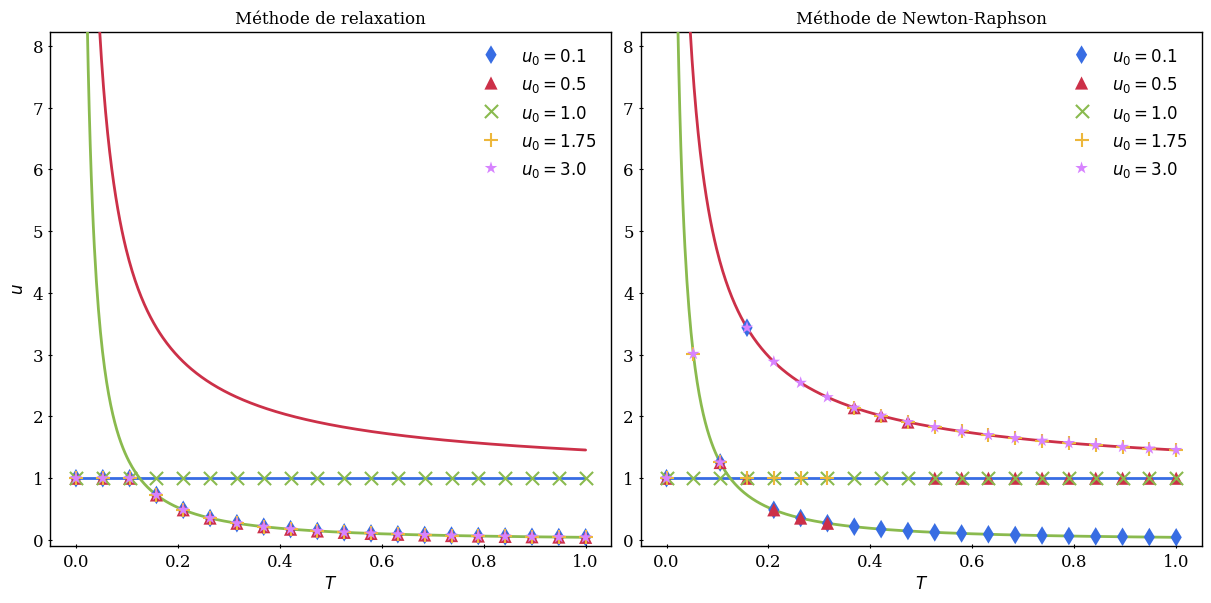

In [98]:
valeurs_initiales = [0.1, 0.5, 1.0, 1.75, 3.0]
marqueurs = ['d', '^', 'x', '+', '*']

# Affichage des solutions
fig1 = gl.Figure(r'$T$', r'$u$', title="Méthode de relaxation")
fig1.add_elements(
    *[gl.Curve.from_function(lambda T: sol_analytiques(T)[i], 0, 1) for i in range(3)],
    *[gl.Scatter(t, relaxation(t, u0=u0), label=rf"$u_0 = {u0}$", marker_style=marqueurs[m], marker_size=90) for m, u0 in enumerate(valeurs_initiales)]
)
u_max = np.max(sol_analytiques(t)[np.isfinite(sol_analytiques(t))]) * 1.1
fig1.y_lim = (-0.1, u_max)

fig2 = gl.Figure(r'$T$', title="Méthode de Newton-Raphson")
fig2.add_elements(
    *[gl.Curve.from_function(lambda T: sol_analytiques(T)[i], 0, 1) for i in range(3)],
    *[gl.Scatter(t, newton_raphson(t, u0=u0), label=rf"$u_0 = {u0}$", marker_style=marqueurs[m], marker_size=90) for m, u0 in enumerate(valeurs_initiales)]
)
fig2.y_lim = (-0.1, u_max)

gl.MultiFigure.from_row([fig1, fig2], size=(12, 6), reference_labels=False).show()

On remarque que selon la valeur initiale utilisée et la valeur de $T$, les méthodes convergent vers des solutions différentes. On constate également que la valeur initiale $u_0=1$, qui correspond à une solution analytique de l'équation, redonne effectivement cette solution peu importe la valeur de $T$.

La méthode de Newton-Raphson retombe sur les trois solutions analytiques selon les combinaisons de $u_0$ et $T$. Il est intéressant de noter que pour des valeurs de $T$ supérieures à environ 0.2, les valeurs initiales choisies permettent de retomber systématiquement sur les trois solutions, ce qui n'est pas le cas pour les plus petites valeurs de $T$. En effet, pour les très petites valeurs de $T$, les solutions analytiques $u_2$ et $u_3$ deviennent très grandes, de telle sorte qu'il faudrait des valeurs initiales plus élevées pour toutes les obtenir. De plus, à $T=0.125$, les solutions $u_1$ et $u_3$ se croisent. Ainsi, aux alentours de cette intersection, il faudrait plusieurs valeurs initiales rapprochées afin d'obtenir les deux solutions. 

La méthode par relaxation, quant à elle, ne retombe jamais sur la plus grande solution, c'est-à-dire $u_2$. Pour mieux comprendre pourquoi, traçons les solutions analytiques selon $T$, de même que la dérivée de la forme non-générale $f_{ng}$ de l'équation (3.14) évaluée aux valeurs des solutions analytiques:  

/var/folders/js/7v50zmys2wzf_12nkl6qzq8r0000gn/T/ipykernel_73853/1132341967.py:12: RuntimeWarning: divide by zero encountered in divide
  return np.array([np.ones_like(T), 0.5*(1 + 2 / (T*(k - 1)) + np.sqrt(1 + 4 / (T*(k - 1)))), 0.5*(1 + 2 / (T*(k - 1)) - np.sqrt(1 + 4 / (T*(k - 1))))])
/var/folders/js/7v50zmys2wzf_12nkl6qzq8r0000gn/T/ipykernel_73853/1132341967.py:12: RuntimeWarning: invalid value encountered in subtract
  return np.array([np.ones_like(T), 0.5*(1 + 2 / (T*(k - 1)) + np.sqrt(1 + 4 / (T*(k - 1)))), 0.5*(1 + 2 / (T*(k - 1)) - np.sqrt(1 + 4 / (T*(k - 1))))])
/var/folders/js/7v50zmys2wzf_12nkl6qzq8r0000gn/T/ipykernel_73853/1132341967.py:37: RuntimeWarning: invalid value encountered in multiply
  return 2*T*(k-1)/(1+T*(k-1)*(1-u))**3


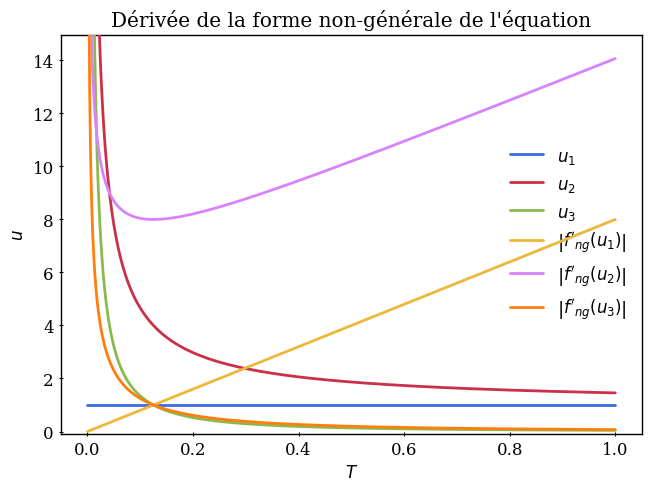

In [99]:
fig = gl.Figure(r'$T$', r'$u$', title="Dérivée de la forme non-générale de l'équation")
labels = [r"$u_1$", r"$u_2$", r"$u_3$", r"$\left|f'_{ng}(u_1)\right|$", r"$\left|f'_{ng}(u_2)\right|$", r"$\left|f'_{ng}(u_3)\right|$"]
fig.add_elements(
    *[gl.Curve.from_function(lambda T: sol_analytiques(T)[i], 0, 1, label=labels[i]) for i in range(3)],
    *[gl.Curve.from_function(lambda T: np.abs(dfu(sol_analytiques(T)[i], T)), 0, 1, label=labels[i+3]) for i in range(3)],
    )
u_max = np.max(sol_analytiques(t)[np.isfinite(sol_analytiques(t))]) * 2
fig.y_lim = (-0.1, u_max)
fig.show()

La méthode par relaxation converge vers une solution $x^*$ seulement si $|f_{ng}'(x^*)|<1$. Or, $|f_{ng}'(u_2)|$ est toujours plus grand que 1, de telle sorte que cette solution n'est jamais atteinte. De même, $|f_{ng}'(u_3)|$ est plus grand que 1 pour $T<0.125$, alors la méthode converge uniquement vers cette solution lorsque $T>0.125$. Pour finir $|f_{ng}'(u_1)|$ est plus grand que 1 pour $T>0.125$, de telle sorte que la méthode devrait converger vers cette solution seulement si $T<0.125$, à l'exception du cas où la valeur initiale $u_0=1$ est utilisée, car cette dernière est déjà la solution recherchée.

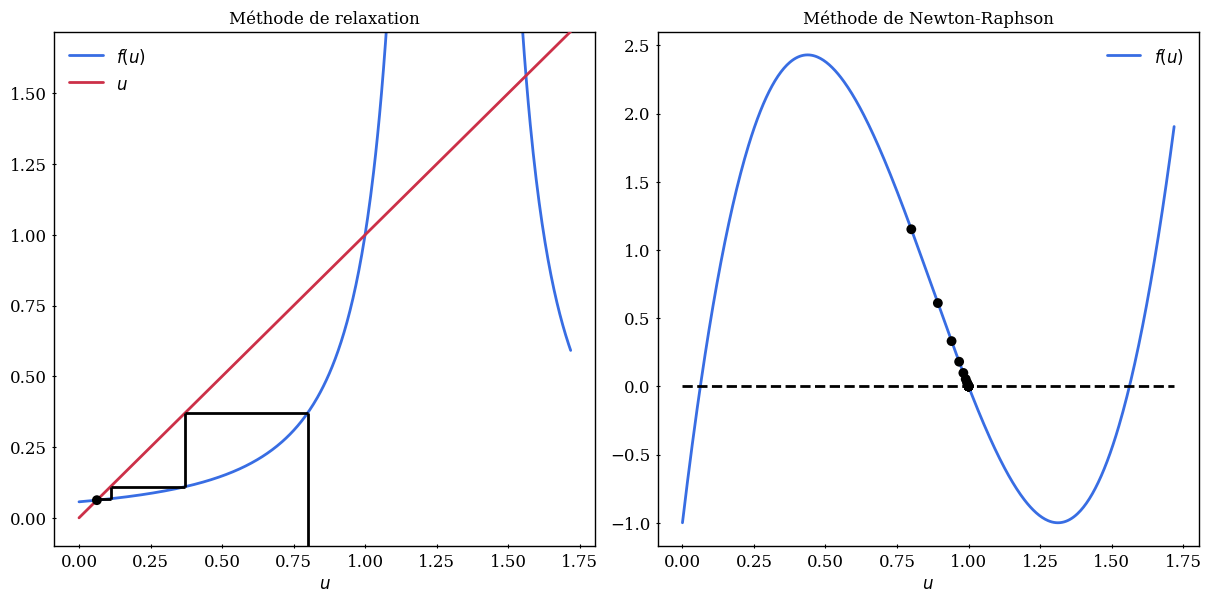

In [ ]:
# Méthode par relaxation successive
def relaxation_successif(T: float | np.ndarray, k: float = 5, u0: float = 0.5, precision: float = 1e-8) -> np.ndarray:
    """
    Méthode de relaxation successive pour résoudre l'équation de contagiosité.
    
    Paramètres:
    -----------
    T (float | np.ndarray) : La probabilité qu’un individu contagieux infectera chacun de ses voisins.
    k (float) : (défaut: 5)
    u0 (float) : Valeur initiale pour la méthode de relaxation.
    precision (float) : Précision désirée pour la solution. La méthode s'arrête lorsque l'erreur est inférieure à cette valeur.

    Retourne:
    --------
    float | np.ndarray
        Les valeurs de u pour lesquelles f(u) = 0 trouvées itérativement.
    """
    u = [u0]
    erreur = 1
    while np.abs(erreur) > precision:
        u_new = fu(u[-1], T, k)
        erreur = np.max(u_new - u[-1])
        u.append(u_new)
    return np.array(u)

# Méthode de Newton-Raphson sucessive
def newton_raphson_successif(T: float | np.ndarray, k: float = 5, u0: float = 0.5, precision: float = 1e-8) -> np.ndarray:
    """
    Méthode de Newton-Raphson successive pour résoudre l'équation de contagiosité.
    
    Paramètres:
    -----------
    T (float | np.ndarray) : La probabilité qu’un individu contagieux infectera chacun de ses voisins.
    k (float) : (défaut: 5)
    u0 (float) : Valeur initiale pour la méthode de relaxation.
    precision (float) : Précision désirée pour la solution. La méthode s'arrête lorsque l'erreur est inférieure à cette valeur.

    Retourne:
    --------
    float | np.ndarray
        Les valeurs de u pour lesquelles f(u) = 0 trouvées itérativement.
    """
    u = [u0]
    erreur = 1
    while np.abs(erreur) > precision:
        u_new = u[-1] - f(u[-1], T, k) / df(u[-1], T, k)
        erreur = np.max(u_new - u[-1])
        u.append(u_new)
    return np.array(u)

# Affichage des solutions sous la forme de diagramme en toile d'araignée
T = 0.8
u0 = 0.8

us = relaxation_successif(T, u0=u0)
previous = -0.1
lignes = []
for i, r in enumerate(us[:-1]):
    lignes.append(gl.Vlines([r], previous, us[i+1], colors='k'))
    lignes.append(gl.Hlines(us[i+1], r, us[i+1], colors='k'))
    previous = us[i+1]


fig1 = gl.Figure(r'$u$', title="Méthode de relaxation_successif")
u_max = np.max(sol_analytiques(T)[np.isfinite(sol_analytiques(T))]) * 1.1
fig1.add_elements(
    gl.Curve.from_function(lambda u: fu(u, T), 0, u_max, label=r"$f(u)$"),
    gl.Curve.from_function(lambda u: u, 0, u_max, label=r"$u$"),
    gl.Scatter(relaxation_successif(T, u0=u0)[-1], relaxation_successif(T, u0=u0)[-1], face_color='k'),
    *lignes
)
fig1.y_lim = (-0.1, u_max)

fig2 = gl.Figure(r'$u$', title="Méthode de Newton-Raphson")

fig2.add_elements(
    gl.Curve.from_function(lambda u: f(u, T), 0, u_max, label=r"$f(u)$"),
    gl.Hlines(0, 0, u_max, line_styles='--'),
    gl.Scatter(newton_raphson_successif(T, u0=u0), f(newton_raphson_successif(T, u0=u0), T), face_color='k'),
)
gl.MultiFigure.from_row([fig1, fig2], size=(12, 6), reference_labels=False).show()

# Références

[1] de Leeuw, Jan. (2023). Differentiating the QR Decomposition. 10.13140/RG.2.2.19201.12640. 